In [568]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
%matplotlib inline

In [569]:
#initializing the dataset
traindf=pd.read_csv("/Users/sourya/Docs/titanic/train.csv")
testdf=pd.read_csv("/Users/sourya/Docs/titanic/test.csv")
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [570]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [571]:
#number of rows and columns in the train dataset
traindf.shape

(891, 12)

In [572]:
#number of rows and columns in the test dataset
testdf.shape

(418, 11)

In [573]:
#number of missing values in each column of train dataset
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [574]:
#Datatypes of each column of the train dataset
traindf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

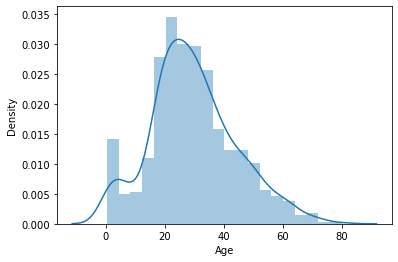

In [575]:
#plotting the distribution of the values in column "Age"
sns.distplot(traindf["Age"])

We can see the mode is at somewhere around 25 and the distribution is positively skewed.

In [576]:
missing_values_count=traindf.isnull().sum()

In [577]:
# how many total missing values do we have in training dataset?
total_cells = np.product(traindf.shape)
total_missing = missing_values_count.sum()

# percent of data that are missing
percent_missing = (total_missing/total_cells) * 100
print("%.4f"%  percent_missing,"% values of total values are missing.")

8.0995 % values of total values are missing.


In [578]:
#now checking missing values in test dataset
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [579]:
#filling missing values of Age column with the mean of the column
traindf["Age"].fillna(traindf["Age"].mean(),inplace=True)
#doing the same for test dataset
testdf["Age"].fillna(traindf["Age"].mean(),inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

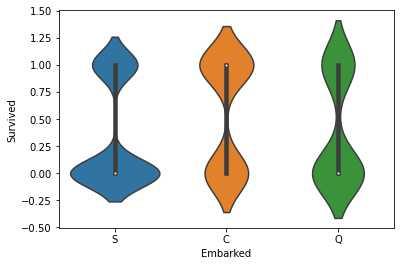

In [580]:
#violinplot of the values in Survived and Embarked column to check how the categories 
#of Embarked is ditribution based on Survival Categories.
sns.violinplot(y="Survived",x="Embarked",data=traindf)

We can see from the violin plot the distribution is not exactly identical
for different categories of Embarked column and also for each of the Survival Classes, 
So we should not drop the Column, we are going to remove the rows with NA values from the column.

In [581]:
traindf.dropna(axis=0,subset=["Embarked"],inplace=True)
#doing the same thing for test dataset
testdf.dropna(axis=0,subset=["Embarked"],inplace=True)

In [582]:
missing_values_percentage_Cabin = missing_values_count.Cabin/traindf.shape[0]*100
print("percentage of missing values in the Cabin columns is %.4f"% missing_values_percentage_Cabin,"%")

percentage of missing values in the Cabin columns is 77.2778 %


In [583]:
#as the percentage of missing values in the Cabin column is too high, we are dropping the column
traindf = traindf.drop("Cabin",axis=1)
#doing the same thing for test dataset
testdf = testdf.drop("Cabin",axis=1)
missing_values_count=traindf.isnull().sum()
#checking missing value counts again to reconfirm all the missing values are treated
missing_values_count

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [584]:
#filling the missing value in Fare column of test dataset with mean of the column
testdf["Fare"].fillna(testdf["Fare"].mean(),inplace=True)

Next, we are going to drop the "Name" and "PassengerId" column as it unqiue to each passenger and does not really have anything to do with predicting survival. Also, we are going to label encode the Ticket column(not using the one hot encoding for this column because one hot encoding will create a difference between total number of columns for train and test dataset, so we wouldn't be able to apply our model to the test dataset).

In [585]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column "Ticket" of both train and test dataset.
traindf["Ticket"]= label_encoder.fit_transform(traindf["Ticket"])
testdf["Ticket"]= label_encoder.fit_transform(testdf["Ticket"])

In [586]:
#dropping "Name" and "PassengerId" column
traindf.drop(["Name","PassengerId"],axis=1,inplace=True)
#doing the same thing for test dataset
testdf.drop(["Name","PassengerId"],axis=1,inplace=True)
#encoding remaining categorical features
traindf1 = pd.get_dummies(traindf)
#doing the same thing for test dataset
testdf = pd.get_dummies(testdf)

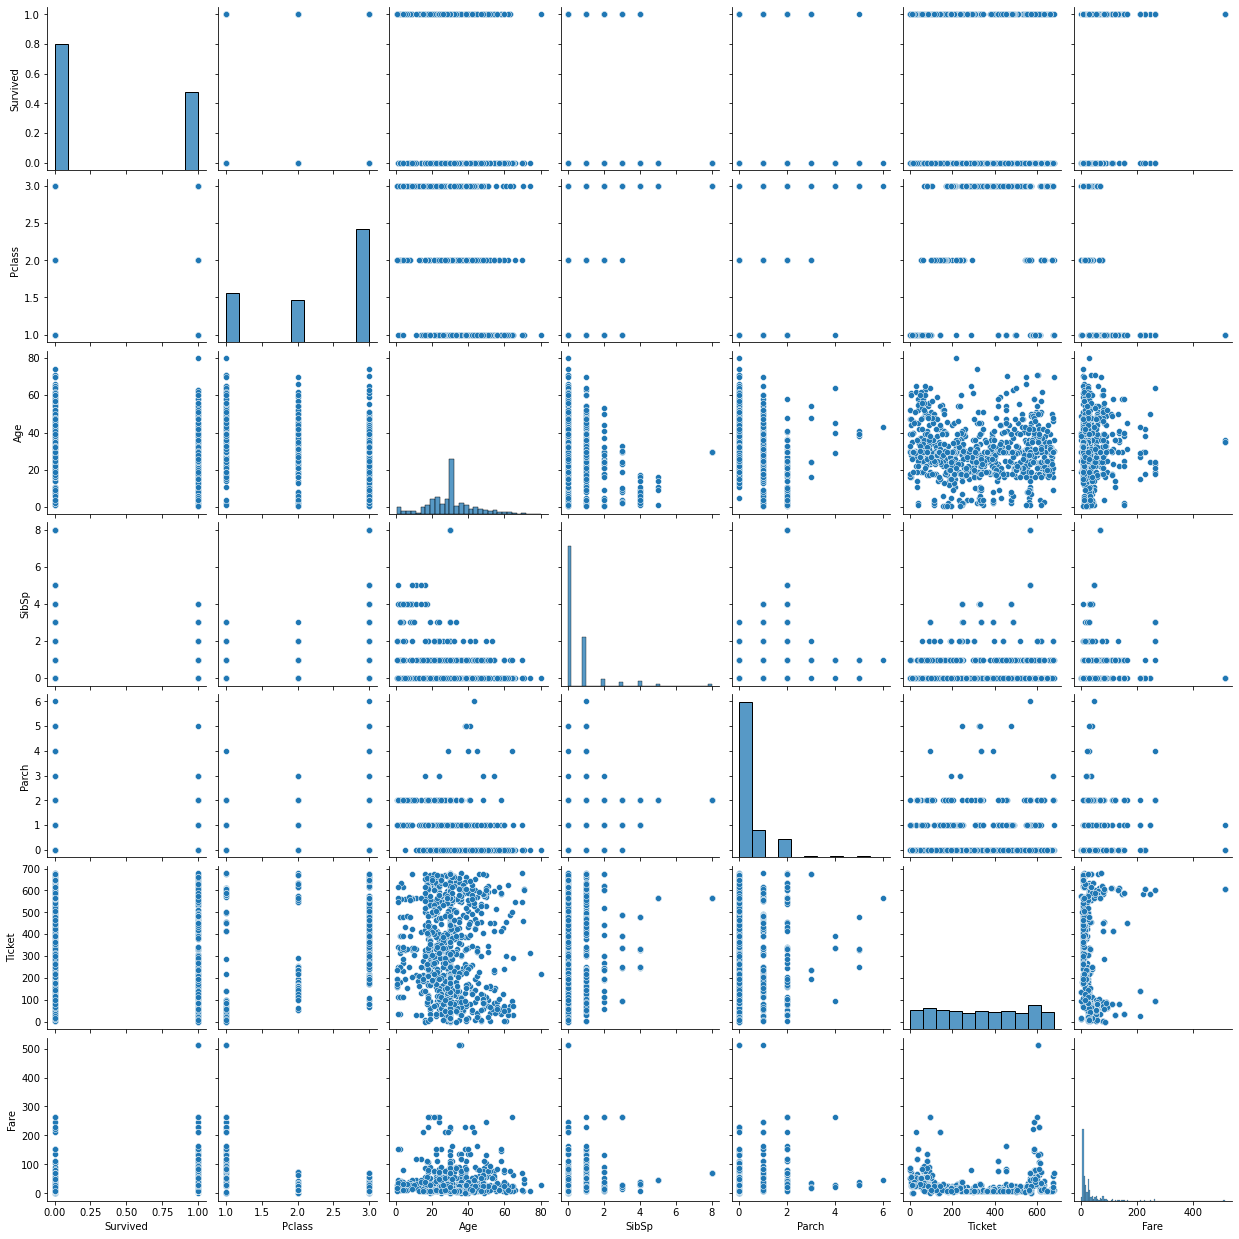

In [587]:
#Plotting relationship among all the attributes
sns.pairplot(traindf)

In [588]:
#correlation matrix
traindf.corr()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,-0.160931,0.255290
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,0.315959,-0.548193
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,-0.063799,0.088604
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.077995,0.160887
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.018409,0.217532
Ticket,-0.160931,0.315959,-0.063799,0.077995,0.018409,1.000000,-0.010562
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,-0.010562,1.000000


<AxesSubplot:>

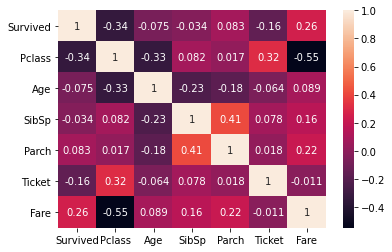

In [589]:
#correlation heatmap
sns.heatmap(traindf.corr(),annot=True)
#features with higher correlation with survival will be more useful.

In [590]:
#preparing data for model training
X = traindf1.drop(["Survived"],axis=1)
y = traindf1["Survived"]

In [591]:
#creating train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
accuracy = list()
#fitting 1000 different decision trees and storing their accuracy scores in the list accuracy.
for k in range(1,101):
    model = DecisionTreeClassifier(random_state=int(k))
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
#printing the accuracies of different decision trees.
accuracy

[0.7471910112359551,
 0.7415730337078652,
 0.7584269662921348,
 0.7415730337078652,
 0.7584269662921348,
 0.7584269662921348,
 0.7528089887640449,
 0.7359550561797753,
 0.7584269662921348,
 0.7528089887640449,
 0.7471910112359551,
 0.7584269662921348,
 0.7528089887640449,
 0.7471910112359551,
 0.7415730337078652,
 0.7415730337078652,
 0.7640449438202247,
 0.7640449438202247,
 0.7528089887640449,
 0.7584269662921348,
 0.7528089887640449,
 0.7415730337078652,
 0.7528089887640449,
 0.7471910112359551,
 0.7640449438202247,
 0.7528089887640449,
 0.7303370786516854,
 0.7303370786516854,
 0.7471910112359551,
 0.7415730337078652,
 0.7528089887640449,
 0.7528089887640449,
 0.7471910112359551,
 0.7640449438202247,
 0.7415730337078652,
 0.7359550561797753,
 0.7471910112359551,
 0.7528089887640449,
 0.7584269662921348,
 0.7584269662921348,
 0.7471910112359551,
 0.7471910112359551,
 0.7415730337078652,
 0.7528089887640449,
 0.7584269662921348,
 0.7471910112359551,
 0.7584269662921348,
 0.7471910112

<AxesSubplot:xlabel='States', ylabel='Score'>

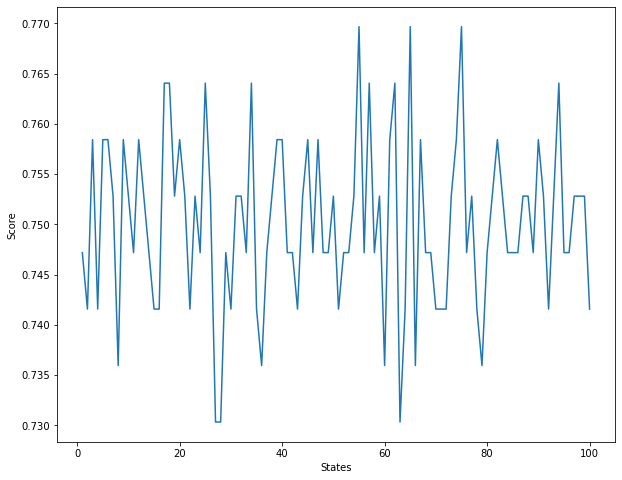

In [592]:
#plotting the accuracy scores for each random states
df=pd.DataFrame({"States":np.arange(1,101,1),"Score":accuracy})
plt.figure(figsize=(10,8))
sns.lineplot(x="States",y="Score",data=df)

In [593]:
#getting the random state with most accuracy
accuracy.index(max(accuracy))+1

55

In [594]:
#re-running the model with 23 random state
model = DecisionTreeClassifier(random_state=55)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#printing accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion matrix : \n")
print(confusion_matrix(y_test, y_pred))

#Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report : \n")
print(classification_report(y_test, y_pred))

Accuracy:  0.7696629213483146

Confusion matrix : 

[[85 20]
 [21 52]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.72      0.71      0.72        73

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



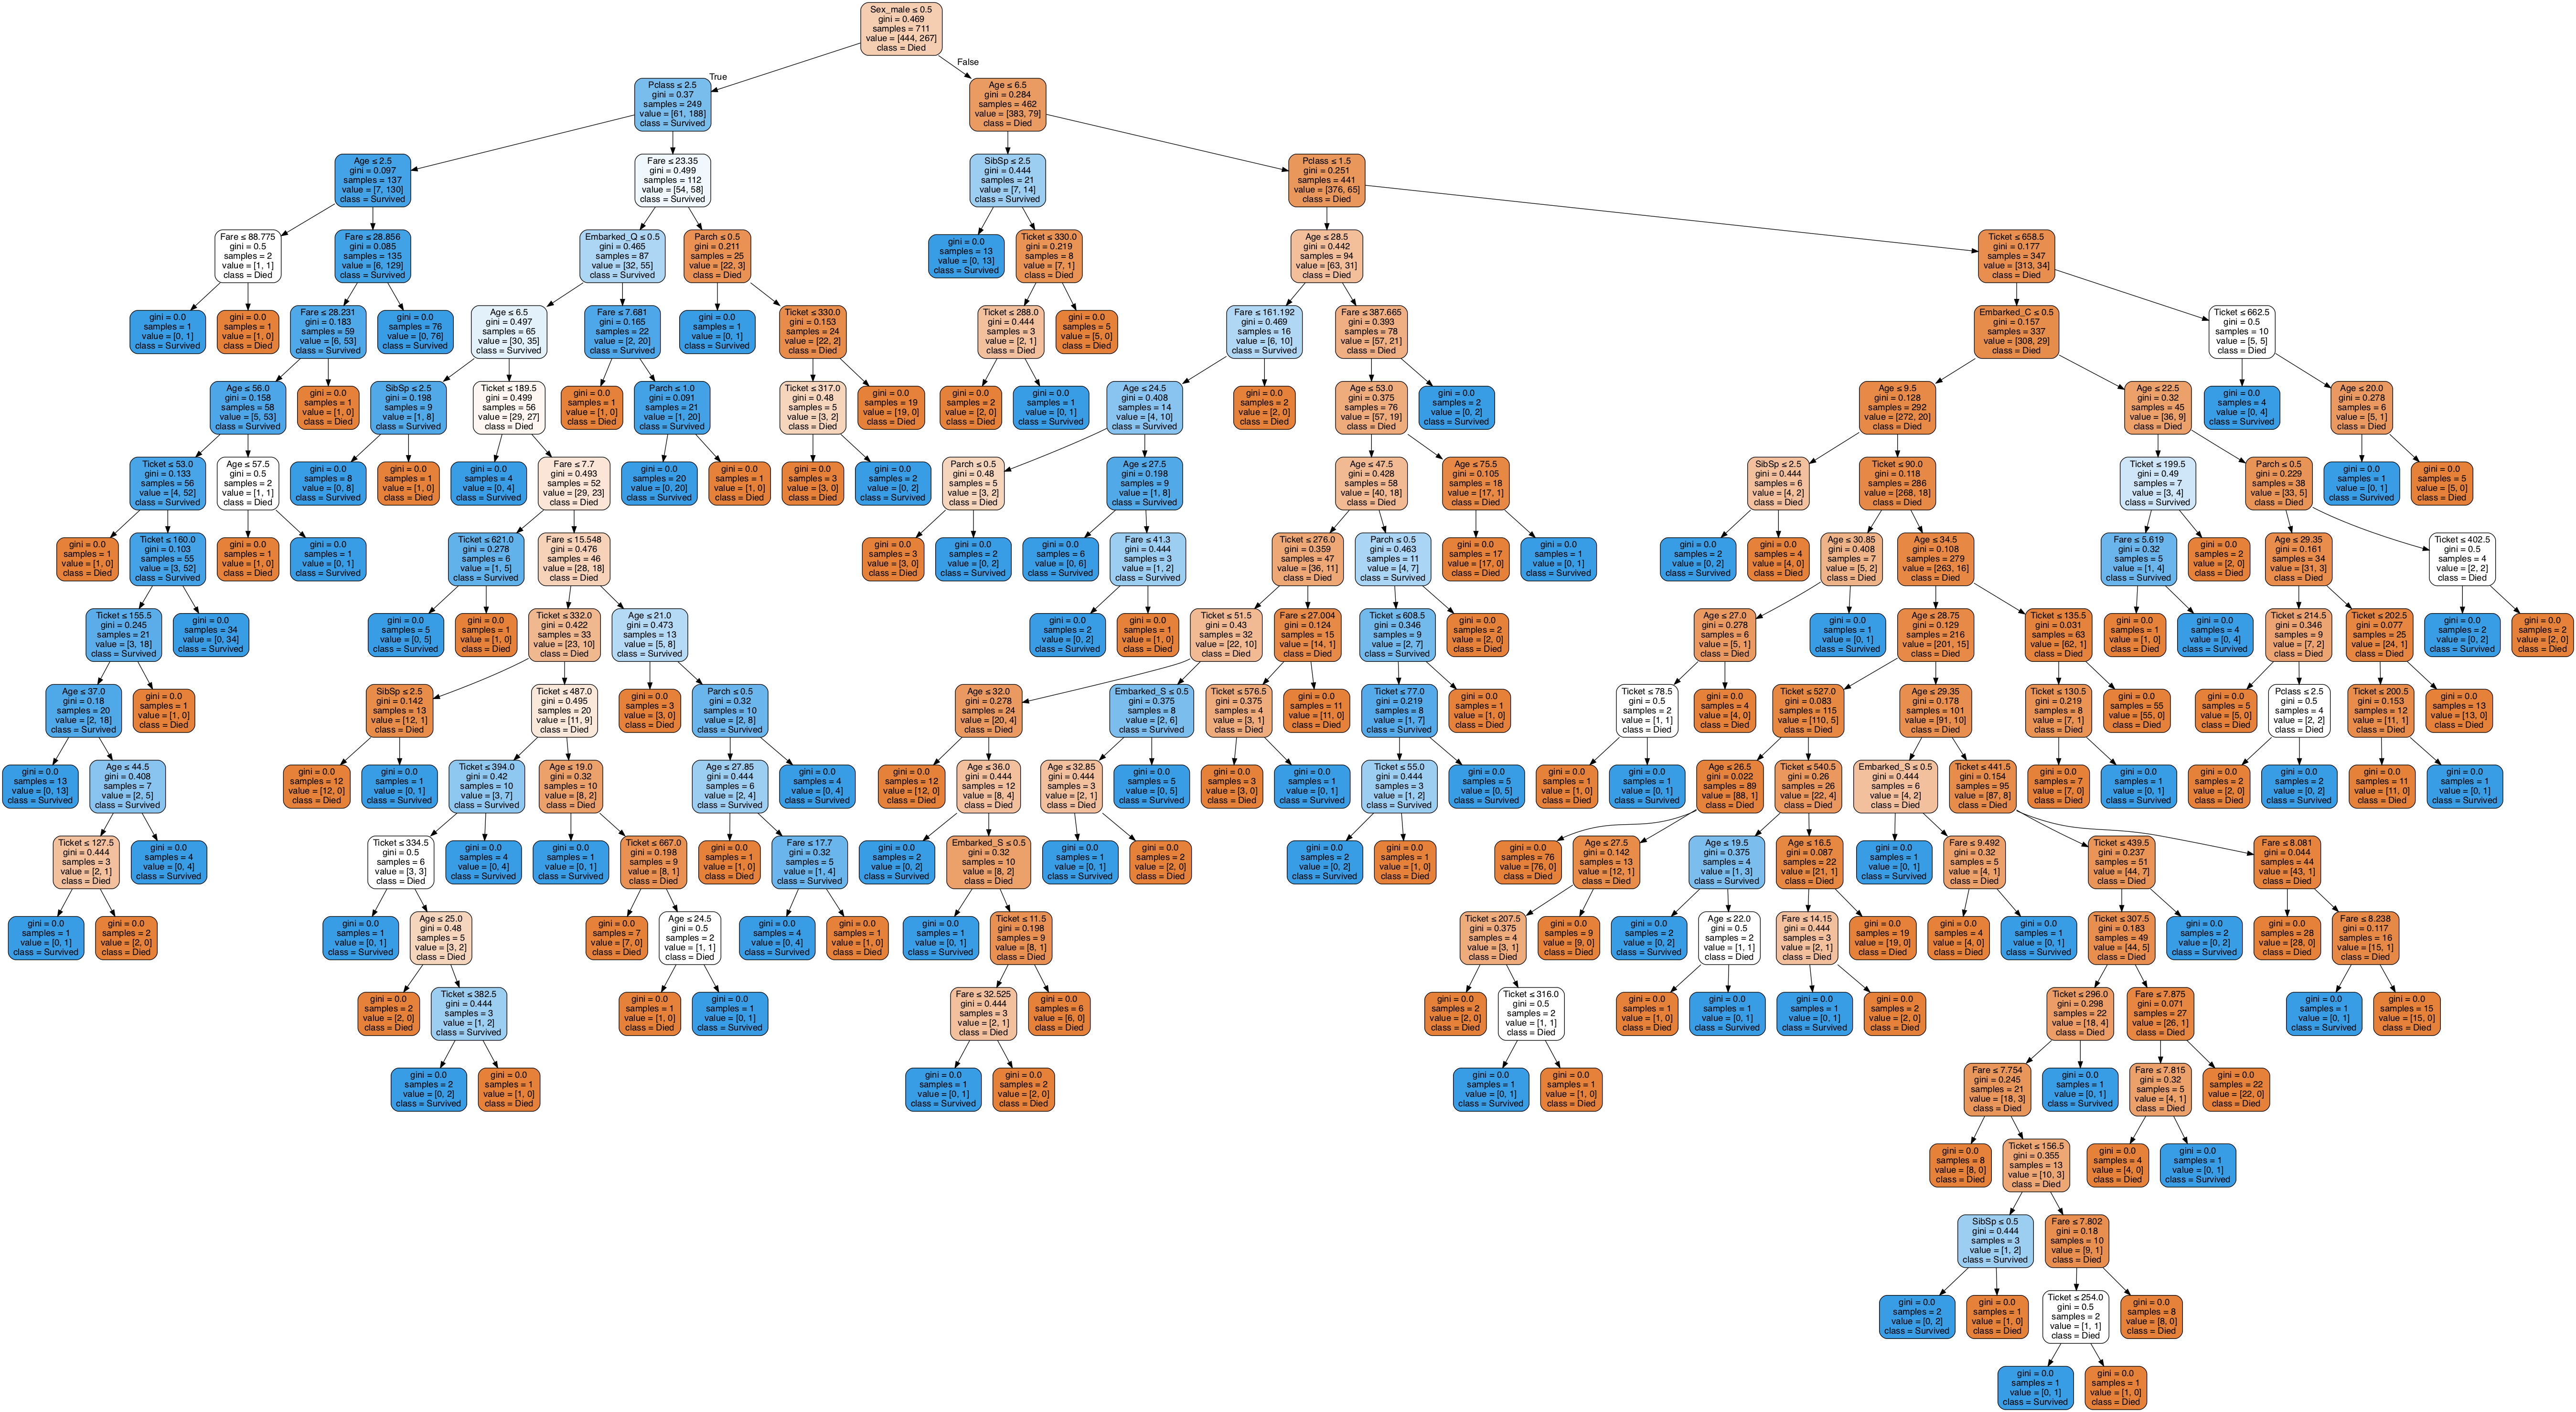

In [595]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

#plotting the decision tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X.columns),class_names=["Died","Survived"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('seeds.png')
Image(graph.create_png())

In [596]:
#now predicting the values for the test data
y_pred = model.predict(testdf)

In [597]:
#storing the results alongside with Passenger Id's of each passenger of whom's survival are to be predicted.
testdf1 = pd.read_csv("/Users/sourya/Docs/titanic/test.csv")
resultdf = pd.DataFrame(testdf1["PassengerId"])
#printing the result
resultdf["Survived"]=y_pred
resultdf.reset_index(drop=True,inplace=True)

In [598]:
#saving the result in csv file
resultdf.to_csv("Titanic_Prediction.csv",index=False)
resultdf

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
